# Predict NBA MVP : Web scraping and ML project

I am trying to predict who is going to be the MVP in a given NBA season. For this, I'll use NBA data on www.basketball-reference.com. This project has 3 big parts: 

1. WEB SCRAPING: I'll download the NBA data I need.  To do the scraping, I'll use python, with the selenium, beautifulsoup, pandas, and requests libraries.  I'll download the files using requests and selenium, then parse them with beautifulsoup and load them into pandas DataFrames. By the end, I'll have csv files that we can then merge and use to make predictions.

2. DATA CLEANING. I'll combine our mvp, player, and team stats data using pandas.  Along the way, I'll work through a lot of data cleaning, including using merge, map, fillna, and replace.  I'll also use matplotlib to explore the data. By the end, I'll have a clean DataFrame that I can use for machine learning.


3. MACHINE LEARNING to predict who will win MVP each year.  I'll first prepare the data for machine learning and use a Ridge Regression model.  I'll then define an error metric, backtest across most of the data set, and iterate on our predictors.  I'll end by using a Random Forest model to make predictions.

## PART 1. WEB SCRAPING

- Download MVP votes with requests
- Parsing the votes table with BeautifulSoup. Extract the data from each html
- Combining MVP votes with Pandas --> mvps.csv


- Download player stats
- Using Selenium to scrape a Javascript page 
- Parsing the stats with Beautifulsoup
- Combining player stats with Pandas  --> players.csv

- Downloading team data
- Parsing the team data with Beautifulsoup
- Combining team stats with Pandas --> teams.csv

## Downloading MVP votes with requests

In [25]:
import requests
import os
import shutil
import pandas as pd
import os
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [2]:
years = list(range(1991,2022))

In [3]:
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"    #replace brackets with every year
year = 1991
url = url_start.format(year) 
data = requests.get(url) 

- We ask request to download that website
- Create a file for each year in mvp folder and open in write mode and overwrite it if already exists (w+)
- Download and write to a file

In [5]:
for year in years:
    url = url_start.format(year)
    
    data = requests.get(url)  #we ask request to download that website
    
    with open("/home/dani/Desktop/NBA/mvp/{}.html".format(year), "w+") as f:  #create a file for each year in mvp folder
        f.write(data.text)     #download and write to a file 

## Parsing the votes table with BeautifulSoup. Extract the data from each html

In [8]:
with open("/home/dani/Desktop/NBA/mvp/1991.html") as f:
    page = f.read()

In [9]:
soup = BeautifulSoup(page, 'html.parser')

Looking at the website, we see that we don't want the top row in the table ("Voting", "Per Game", "Shooting", "Advanced"). We want to remove from html before load the table on pandas.
How to find it? We inspect it, it is an html element with tr tag. This specific tr tag has a class called over_header

In [10]:
soup.find('tr', class_="over_header").decompose()   #remove the row with tr tag and over_header class

We only want the table, don't the whole page

In [11]:
mvp_table = soup.find_all(id="mvp")[0]

Create the table from 1991. We need mvp_table as a string. The zero means we just want first element

In [19]:
mvp_1991 = pd.read_html(str(mvp_table))[0]
mvp_1991

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225
5,6,Clyde Drexler,28,POR,1.0,75.0,960,0.078,82,34.8,21.5,6.7,6.0,1.8,0.7,0.482,0.319,0.794,12.4,0.209
6,7,Kevin Johnson,24,PHO,0.0,32.0,960,0.033,77,36.0,22.2,3.5,10.1,2.1,0.1,0.516,0.205,0.843,12.7,0.220
7,8,Dominique Wilkins,31,ATL,0.0,29.0,960,0.030,81,38.0,25.9,9.0,3.3,1.5,0.8,0.470,0.341,0.829,11.4,0.177
8,9T,Larry Bird,34,BOS,0.0,25.0,960,0.026,60,38.0,19.4,8.5,7.2,1.8,1.0,0.454,0.389,0.891,6.6,0.140
9,9T,Terry Porter,27,POR,0.0,25.0,960,0.026,81,32.9,17.0,3.5,8.0,2.0,0.1,0.515,0.415,0.823,13.0,0.235


In [20]:
mvp_1991["Year"] = 1991

In [21]:
mvp_1991.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


### All seasons

In [22]:
dfs = []
for year in years:
    with open("/home/dani/Desktop/NBA/mvp/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find_all(id="mvp")[0]
    mvp_df = pd.read_html(str(mvp_table))[0]
    mvp_df["Year"] = year
    dfs.append(mvp_df)

## Combining MVP votes with pandas. I just want one df

In [23]:
mvps = pd.concat(dfs)

mvps.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021
14,13T,Kawhi Leonard,29,LAC,0.0,1.0,1010,0.001,52,34.1,...,6.5,5.2,1.6,0.4,0.512,0.398,0.885,8.8,0.238,2021


In [24]:
mvps.to_csv("mvps.csv")

## Download player stats

We want to predict the MVP, so we need the stats from all the players from 1991 to 2021 to train a machine learning model

In [28]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

for year in years:
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("/home/dani/Desktop/NBA/player/{}.html".format(year), "w+") as f:
        f.write(data.text)

## Using Selenium to scrape a Javascript page 

In [26]:
driver = webdriver.Chrome(
    executable_path="/home/dani/Downloads/chromedriver"
    )
#from selenium import webdriver

<ipython-input-26-eca1f1b55304>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(


In [29]:
for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    with open("/home/dani/Desktop/NBA/player/1991.html".format(year), "w+") as f:
        f.write(driver.page_source)

## Parsing the stats with Beautifulsoup

As before, we want to remove the extra tr's of the table

In [31]:
dfs = []
for year in years:
    with open ("/home/dani/Desktop/NBA/player/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="per_game_stats")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)

## Combining player stats with Pandas

In [32]:
players = pd.concat(dfs)

In [33]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,1991
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,1991
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,1991
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,1991
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,1991


In [34]:
players.to_csv("players.csv")

## Downloading team data

- To make the predictions, we want to make sure that we insert the record of their team so the ML model consider it and use it as a record
- We use Division Standings, which is faster and easier (COnference Standings goes with Java)

In [35]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [36]:
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("/home/dani/Desktop/NBA/team/{}.html".format(year), "w+") as f:
        f.write(data.text)

## Parsing the team data with Beautifulsoup

We need to extract two tables

In [37]:
dfs = []
for year in years:
    with open("/home/dani/Desktop/NBA/team/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]     #remove
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]     #remove
    dfs.append(w_df)

## Combining team stats with pandas

In [38]:
teams = pd.concat(dfs)

In [39]:
teams.tail()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans
17,17,55,.236,25.0,108.8,116.7,-7.50,2021,Houston Rockets


In [40]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [41]:
teams.to_csv("teams.csv")

## PART 2. DATA CLEANING 

- Cleaning player data
- Combining the player and mvp data --> combined dataframe
- Cleaning the team data
- Combined data frame and teams df
- Exploring data and looking for correlations

In [43]:
mvps = pd.read_csv("mvps.csv")
mvps.head()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


Remove some columns that they are on players.csv

In [45]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


## Cleaning Player data

In [48]:
players = pd.read_csv("players.csv")
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,1991
1,1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,1991
2,2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,1991
3,3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,1991
4,4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,1991


In [49]:
del players["Unnamed: 0"]

In [50]:
del players["Rk"]

In [52]:
players["Player"].head(50)

0             Precious Achiuwa
1                 Jaylen Adams
2                 Steven Adams
3                  Bam Adebayo
4            LaMarcus Aldridge
5            LaMarcus Aldridge
6            LaMarcus Aldridge
7            Ty-Shon Alexander
8     Nickeil Alexander-Walker
9                Grayson Allen
10               Jarrett Allen
11               Jarrett Allen
12               Jarrett Allen
13             Al-Farouq Aminu
14             Al-Farouq Aminu
15             Al-Farouq Aminu
16               Kyle Anderson
17       Giannis Antetokounmpo
18        Kostas Antetokounmpo
19      Thanasis Antetokounmpo
20             Carmelo Anthony
21                Cole Anthony
22                  OG Anunoby
23            Ryan Arcidiacono
24                Trevor Ariza
25               D.J. Augustin
26               D.J. Augustin
27               D.J. Augustin
28                 Deni Avdija
29               Deandre Ayton
30              Udoka Azubuike
31                Dwayne Bacon
32      

In [53]:
players["Player"] = players["Player"].str.replace("*","", regex=False)  #don't use regex, treat this as a regular asterisk

In [54]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,1991
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,1991
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,1991
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,1991
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,1991


Some players has several rows in the same year, because they play in different teams in the same seasons. We don't want this

In [56]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
738,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1683,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
2182,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2652,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
3219,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3812,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [57]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

In [39]:
players.tail(50)

Player    Pos Age   Tm   G  GS  \
Player               Year                                                       
Zoran Planinić       2006 8622         Zoran Planinić     PG  23  NJN  56   1   
Zydrunas Ilgauskas   1998 4033     Zydrunas Ilgauskas      C  22  CLE  82  81   
                     1999 4592     Zydrunas Ilgauskas      C  23  CLE   5   5   
                     2001 5640     Zydrunas Ilgauskas      C  25  CLE  24  24   
                     2002 6195     Zydrunas Ilgauskas      C  26  CLE  62  23   
                     2003 6705     Zydrunas Ilgauskas      C  27  CLE  81  81   
                     2004 7250     Zydrunas Ilgauskas      C  28  CLE  81  81   
                     2005 7862     Zydrunas Ilgauskas      C  29  CLE  78  78   
                     2006 8456     Zydrunas Ilgauskas      C  30  CLE  78  78   
                     2007 9016     Zydrunas Ilgauskas      C  31  CLE  78  78   
                     2008 9598     Zydrunas Ilgauskas      C  32  CLE  73  73   
                     2009 10214    Zydrunas Ilgauskas      C  33  CLE  65  65   
                     2010 10822    Zydrunas Ilgauskas      C  34  CLE  64   6   
                     2011 11457    Zydrunas Ilgauskas      C  35  MIA  72  51   
Zylan Cheatham       2020 17033        Zylan Cheatham     PF  24  NOP   4   0   
Álex Abrines         2017 14869          Álex Abrines     SG  23  OKC  68   6   
                     2018 15487          Álex Abrines     SG  24  OKC  75   8   
                     2019 16176          Álex Abrines     SG  25  OKC  31   2   
Ángel Delgado        2019 16350         Ángel Delgado      C  24  LAC   2   0   
Óscar Torres         2002 6445           Óscar Torres     SG  25  HOU  65  13   
                     2003 6935           Óscar Torres     SG  26  GSW  17   0   
Ömer Aşık            2011 11182             Ömer Aşık      C  24  CHI  82   0   
                     2012 11813             Ömer Aşık      C  25  CHI  66   2   
                     2013 12392             Ömer Aşık      C  26  HOU  82  82   
                     2014 12994             Ömer Aşık      C  27  HOU  48  19   
                     2015 13622             Ömer Aşık      C  28  NOP  76  76   
                     2016 14296             Ömer Aşık      C  29  NOP  68  64   
                     2017 14893             Ömer Aşık      C  30  NOP  31  19   
                     2018 15509             Ömer Aşık      C  31  CHI  18   0   
Šarūnas Jasikevičius 2006 8477   Šarūnas Jasikevičius     PG  29  IND  75  15   
                     2007 9039   Šarūnas Jasikevičius  SG-PG  30  GSW  63   3   
Šarūnas Marčiulionis 1992 997    Šarūnas Marčiulionis     SG  27  GSW  72   5   
                     1993 1460   Šarūnas Marčiulionis     SF  28  GSW  30   8   
                     1995 2435   Šarūnas Marčiulionis     SG  30  SEA  66   4   
                     1996 2937   Šarūnas Marčiulionis     SG  31  SAC  53   0   
                     1997 3529   Šarūnas Marčiulionis     SG  32  DEN  17   0   
Žan Tabak            1995 2582              Žan Tabak      C  24  HOU  37   0   
                     1996 3133              Žan Tabak      C  25  TOR  67  18   
                     1997 3732              Žan Tabak      C  26  TOR  13   4   
                     1998 4284              Žan Tabak      C  27  BOS  57  34   
                     2000 5351              Žan Tabak      C  29  IND  18   0   
                     2001 5913              Žan Tabak      C  30  IND  55  14   
Žarko Čabarkapa      2004 7089        Žarko Čabarkapa     PF  22  PHO  49   4   
                     2005 7693        Žarko Čabarkapa     PF  23  GSW  40   0   
                     2006 8300        Žarko Čabarkapa     PF  24  GSW  61   0   
Željko Rebrača       2002 6366         Željko Rebrača      C  29  DET  74   4   
                     2003 6866         Željko Rebrača      C  30  DET  30  12   
                     2004 7447         Željko Rebrača      C  31  ATL  24   2 

In [59]:
players.index = players.index.droplevel()

In [60]:
players.index = players.index.droplevel()

In [61]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
904,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1363,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1850,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2338,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2834,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996


In [62]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
738,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1683,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
2182,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2652,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
3219,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3812,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


## Combining the player and mvp data

- outer = if you can't find the data in the other df, keep the data anyways.

In [63]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])
combined.head()  #last 3 columns are from mvp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN


- Players with votes in mvp

In [64]:
combined[combined["Pts Won"] > 0]   

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
188,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
334,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
336,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
337,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
338,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,Bernard King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,7.0,960.0,0.007
14263,Kenny Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,5.0,960.0,0.005
14264,Hakeem Olajuwon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,4.0,960.0,0.004
14265,Tim Hardaway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,1.0,960.0,0.001


- Fix NaN values in Pts Won, Pts Max and Share columns

In [65]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.000
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.000
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.000
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.000
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,Bernard King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,7.0,960.0,0.007
14263,Kenny Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,5.0,960.0,0.005
14264,Hakeem Olajuwon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,4.0,960.0,0.004
14265,Tim Hardaway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1991,1.0,960.0,0.001


## Cleaning the team data

Team's data has team record --> That's important to make a prediction

In [66]:
teams = pd.read_csv("teams.csv")
teams.head(30)   

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


We want to remove any rows that have the name of the division in them

In [68]:
teams = teams[~teams["W"].str.contains("Division")].copy() #get rid all the row with Division string
teams.head()   

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


Get rid all the asterisks on team names

In [69]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)
teams.head(5) 

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


We don't have the same style of names in the dfs, we have to change it

In [70]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [71]:
combined['Team'] = combined['Tm']
combined['Team'] = combined['Team'].replace(['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB'],
 ['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']
                                           )

In [72]:
combined.tail(60)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
14207,Zydrunas Ilgauskas,C,32,CLE,73,73,30.4,5.7,12.0,.474,...,0.5,1.6,1.8,3.4,14.1,2008,0.0,0.0,0.000,Cleveland Cavaliers
14208,Zydrunas Ilgauskas,C,33,CLE,65,65,27.2,5.3,11.1,.472,...,0.4,1.3,1.4,2.8,12.9,2009,0.0,0.0,0.000,Cleveland Cavaliers
14209,Zydrunas Ilgauskas,C,34,CLE,64,6,20.9,3.0,6.8,.443,...,0.2,0.8,1.0,2.9,7.4,2010,0.0,0.0,0.000,Cleveland Cavaliers
14210,Zydrunas Ilgauskas,C,35,MIA,72,51,15.9,2.3,4.4,.508,...,0.3,0.8,0.7,2.6,5.0,2011,0.0,0.0,0.000,Miami Heat
14211,Zylan Cheatham,PF,24,NOP,4,0,12.8,1.5,2.3,.667,...,0.3,0.3,1.0,2.5,3.0,2020,0.0,0.0,0.000,New Orleans/Oklahoma City Hornets
14212,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,.393,...,0.5,0.1,0.5,1.7,6.0,2017,0.0,0.0,0.000,Oklahoma City Thunder
14213,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,0.5,0.1,0.3,1.7,4.7,2018,0.0,0.0,0.000,Oklahoma City Thunder
14214,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,0.5,0.2,0.5,1.7,5.3,2019,0.0,0.0,0.000,Oklahoma City Thunder
14215,Ángel Delgado,C,24,LAC,2,0,7.5,0.5,2.5,.200,...,0.5,0.0,0.0,1.0,1.5,2019,0.0,0.0,0.000,Los Angeles Clippers
14216,Óscar Torres,SG,25,HOU,65,13,16.5,2.1,5.2,.396,...,0.4,0.1,0.8,1.0,6.0,2002,0.0,0.0,0.000,Houston Rockets


## Combined data frame and teams df

In combined df, add row from teams with win and loss records

In [73]:
stats = combined.merge(teams, how="outer",on=["Team", "Year"])

In [74]:
stats   #the last columns are from teams df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.0,Los Angeles Lakers,13.0,43,39,.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,.458,...,0.0,Los Angeles Lakers,13.0,43,39,.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,.469,...,0.0,Los Angeles Lakers,13.0,43,39,.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,.407,...,0.0,Los Angeles Lakers,13.0,43,39,.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,.222,...,0.0,Los Angeles Lakers,13.0,43,39,.524,14.0,100.4,101.5,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Washington Wizards,15.0,25,47,.347,18.5,114.4,119.1,-5.24
14313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,New Orleans Pelicans,17.0,30,42,.417,14.0,115.8,117.1,-0.55
14314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Washington Wizards,14.0,34,38,.472,7.0,116.6,118.5,-1.85
14315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Charlotte Hornets,15.0,33,39,.458,8.0,109.5,111.4,-1.94


In [75]:
del stats["Unnamed: 0"]

In [76]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

- Convert to numerical columns

In [77]:
stats = stats.apply(pd.to_numeric, errors='ignore')  #if there is an error, ignore. 
#for instance, don't do anything in strings columns like player, pos, tm

In [78]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

GB (games back) shoud be an integer, let's see what happens

In [79]:
stats["GB"].unique()

array(['14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0', '24.0',
       nan, '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0', '1.0',
       '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '26.0', '16.0', '41.0', '12.0', '50.0', '10.0',
       '30.0', '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0',
       '39.0', '48.0', '46.0', '10.5', '32.0', '38.0', '31.0', '33.0',
       '27.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5',
       '18.5'], dtype=object)

In [80]:
stats["GB"] = pd.to_numeric(stats["GB"].str.replace("—","0"))

In [81]:
stats["GB"].unique()

array([14. , 23. ,  7. ,  0. , 40. , 42. , 18. ,  6. , 24. ,  nan, 37. ,
       29. , 21. , 28. , 25. ,  8. , 19. ,  1. , 13. , 17. ,  3. , 15. ,
        9. ,  2. , 35. , 20. , 11. ,  5. , 26. , 16. , 41. , 12. , 50. ,
       10. , 30. , 34. ,  4. ,  1.5, 22. , 51. , 36. , 43. , 39. , 48. ,
       46. , 10.5, 32. , 38. , 31. , 33. , 27. , 21.5, 45. , 22.5, 25.5,
        3.5, 20.5, 11.5, 44. , 52. , 56. ,  2.5, 12.5, 47. , 32.5,  4.5,
       18.5])

In [82]:
stats.to_csv("player_mvp_stats.csv")  #csv to use it later on ML

## Exploring data

Look at anyone who played in more that 70 games and score a lot of points

In [83]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring
#James Harden has the highest score from 1991

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9774,James Harden,PG,29.0,HOU,78.0,78.0,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
1047,Kobe Bryant,SG,27.0,LAL,80.0,80.0,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
4511,Allen Iverson,PG,30.0,PHI,72.0,72.0,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
10085,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
6983,Tracy McGrady,SG,23.0,ORL,75.0,74.0,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
6427,Kevin Durant,SF,25.0,OKC,81.0,81.0,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
1061,Kobe Bryant,SG,28.0,LAL,77.0,77.0,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42.0,40.0,0.512,19.0,103.3,103.4,0.24
6479,Russell Westbrook,PG,28.0,OKC,81.0,81.0,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47.0,35.0,0.573,4.0,106.6,105.8,1.14
3289,LeBron James,SF,21.0,CLE,79.0,79.0,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50.0,32.0,0.610,14.0,97.6,95.4,2.17
964,Allen Iverson,SG,25.0,PHI,71.0,71.0,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56.0,26.0,0.683,0.0,94.7,90.4,3.64


<AxesSubplot:xlabel='Player'>

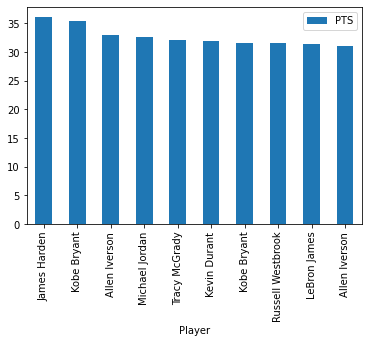

In [84]:
highest_scoring.plot.bar("Player", "PTS")

<AxesSubplot:xlabel='Player'>

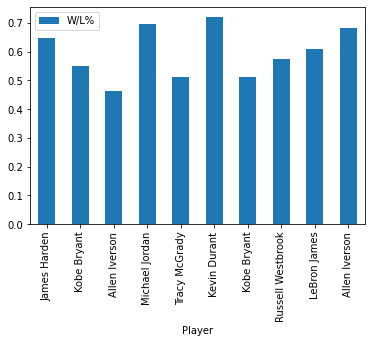

In [85]:
highest_scoring.plot.bar("Player", "W/L%")

<AxesSubplot:xlabel='Player'>

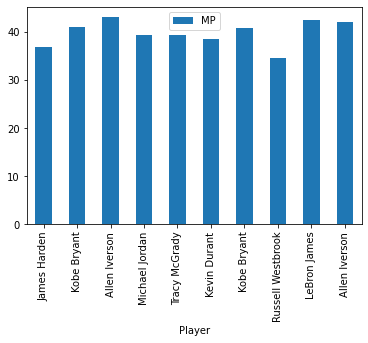

In [86]:
highest_scoring.plot.bar("Player", "MP")

In [87]:
highest_scoring_by_year = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scoring_by_year
#we apply this lambda in every year

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1991,3662,Stephen Curry,PG,32.0,GSW,63.0,63.0,34.2,10.4,21.7,0.482,...,0.0,0.000,Golden State Warriors,44.0,38.0,0.537,19.0,116.6,115.0,1.72
1992,10072,Michael Jordan,SG,28.0,CHI,80.0,80.0,38.8,11.8,22.7,0.519,...,960.0,0.938,Chicago Bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07
1993,10085,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
1994,8806,David Robinson,C,28.0,SAS,80.0,80.0,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
1995,7431,Shaquille O'Neal,C,22.0,ORL,79.0,79.0,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57.0,25.0,0.695,0.0,110.9,103.8,6.44
1996,10615,Michael Jordan,SG,32.0,CHI,82.0,82.0,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1997,10629,Michael Jordan,SG,33.0,CHI,82.0,82.0,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69.0,13.0,0.841,0.0,103.1,92.3,10.70
1998,10643,Michael Jordan,SG,34.0,CHI,82.0,82.0,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24
1999,933,Allen Iverson,SG,23.0,PHI,48.0,48.0,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28.0,22.0,0.560,5.0,89.7,87.6,2.56


<AxesSubplot:xlabel='Year'>

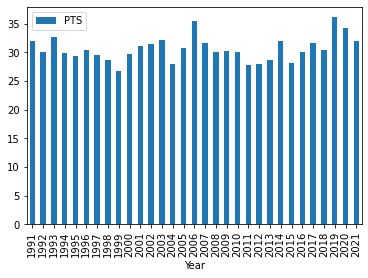

In [88]:
highest_scoring_by_year.plot.bar("Year", "PTS")

In [89]:
highest_minutes_by_year = stats.groupby("Year").apply(lambda x: x.sort_values("MP", ascending=False).head(1))
highest_minutes_by_year 

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1991,3447,Julius Randle,PF,26.0,NYK,71.0,71.0,37.6,8.5,18.6,0.456,...,0.0,0.000,New York Knicks,39.0,43.0,0.476,17.0,103.1,103.3,-0.43
1992,4932,Chris Mullin,SF,28.0,GSW,81.0,81.0,41.3,10.2,19.6,0.524,...,960.0,0.084,Golden State Warriors,55.0,27.0,0.671,2.0,118.7,114.8,3.77
1993,4953,Chris Mullin,SF,29.0,GSW,46.0,46.0,41.3,10.3,20.2,0.510,...,0.0,0.000,Golden State Warriors,34.0,48.0,0.415,28.0,109.9,110.9,-0.94
1994,9931,Latrell Sprewell,SG,23.0,GSW,82.0,82.0,43.1,7.5,17.3,0.433,...,1010.0,0.001,Golden State Warriors,50.0,32.0,0.610,13.0,107.9,106.1,1.76
1995,1150,Vin Baker,PF,23.0,MIL,82.0,82.0,41.0,7.2,15.0,0.483,...,0.0,0.000,Milwaukee Bucks,34.0,48.0,0.415,18.0,99.3,103.7,-4.30
1996,8333,Anthony Mason,SF,29.0,NYK,82.0,82.0,42.2,5.5,9.7,0.563,...,0.0,0.000,New York Knicks,47.0,35.0,0.573,13.0,97.2,94.9,2.24
1997,8346,Anthony Mason,PF,30.0,CHH,73.0,73.0,43.1,5.9,11.3,0.525,...,1150.0,0.006,Charlotte Hornets,54.0,28.0,0.659,15.0,98.9,97.0,2.13
1998,101,Michael Finley,SF,24.0,DAL,82.0,82.0,41.4,8.2,18.4,0.449,...,1160.0,0.001,Dallas Mavericks,20.0,62.0,0.244,42.0,91.4,97.5,-6.33
1999,933,Allen Iverson,SG,23.0,PHI,48.0,48.0,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28.0,22.0,0.560,5.0,89.7,87.6,2.56


In [90]:
stats.groupby("Year").apply(lambda x: x.shape[0])

Year
1991    563
1992    387
1993    391
1994    404
1995    406
1996    429
1997    442
1998    440
1999    441
2000    440
2001    442
2002    441
2003    429
2004    443
2005    465
2006    460
2007    460
2008    451
2009    444
2010    443
2011    453
2012    479
2013    468
2014    482
2015    495
2016    479
2017    489
2018    543
2019    533
2020    532
2021    543
dtype: int64

#### Looking for correlations: what values correlate with share. Share is the percentage of votes divided with number of votes that someone got in a given year

- GS : game started 
- FG : field goals
- 2P : 2 points
- PTS : points
- OR : offensive rebound
- DR : deffensive rebounds
- BLK : blocks
- W : win
- L : loss

In [91]:
stats.corr()["Share"]

Age        0.019130
G          0.089116
GS         0.165633
MP         0.159461
FG         0.270233
FGA        0.244276
FG%        0.062888
3P         0.090988
3PA        0.091188
3P%        0.011779
2P         0.272143
2PA        0.249778
2P%        0.058337
eFG%       0.055319
FT         0.309721
FTA        0.315733
FT%        0.035315
ORB        0.099683
DRB        0.208719
TRB        0.182778
AST        0.195916
STL        0.170991
BLK        0.151989
TOV        0.228893
PF         0.070639
PTS        0.281003
Year      -0.005916
Pts Won    0.995154
Pts Max    0.521416
Share      1.000000
W          0.119393
L         -0.119237
W/L%       0.123506
GB        -0.100121
PS/G       0.044040
PA/G      -0.040245
SRS        0.119428
Name: Share, dtype: float64

<AxesSubplot:>

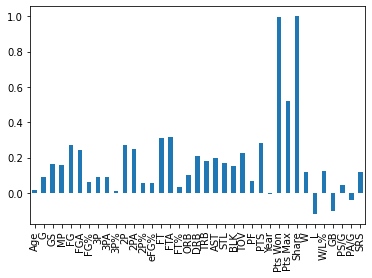

In [92]:
stats.corr()["Share"].plot.bar()

## PART 3 : ML

We are going to use the per game stats to predict how many points a player win in MVP votes --> SHARE COLUMN

- Prepare data
- Training ML model: Ridge regression
- Identifyng an error metric -- evaluate if this algorithm do a good job
- Implementing backtesting to predict each year
- Diagnosing model performance
- Adding more predictors
- Using a random forest

## Prepare data

In [93]:
stats = pd.read_csv("player_mvp_stats.csv")

In [94]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,28.0,LAL,82.0,53.0,35.4,4.7,9.8,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
1,1,Byron Scott,SG,30.0,LAL,82.0,82.0,32.7,5.6,12.3,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
2,2,Chucky Brown,SF,23.0,LAL,42.0,2.0,10.3,1.4,3.0,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
3,3,Cliff Robinson,PF,31.0,LAL,9.0,0.0,8.7,1.2,3.0,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
4,4,Demetrius Calip,PG,22.0,LAL,7.0,0.0,8.3,0.6,2.6,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14312,14312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Washington Wizards,25.0,47.0,0.347,18.5,114.4,119.1,-5.24
14313,14313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New Orleans Pelicans,30.0,42.0,0.417,14.0,115.8,117.1,-0.55
14314,14314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Washington Wizards,34.0,38.0,0.472,7.0,116.6,118.5,-1.85
14315,14315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Charlotte Hornets,33.0,39.0,0.458,8.0,109.5,111.4,-1.94


In [95]:
del stats["Unnamed: 0"]

In [96]:
pd.isnull(stats).sum()

Player       50
Pos          70
Age          70
Tm           70
G            70
GS           70
MP           70
FG           70
FGA          70
FG%         120
3P           70
3PA          70
3P%        2073
2P           70
2PA          70
2P%         158
eFG%        120
FT           70
FTA          70
FT%         545
ORB          70
DRB          70
TRB          70
AST          70
STL          70
BLK          70
TOV          70
PF           70
PTS          70
Year          0
Pts Won      50
Pts Max      50
Share        50
Team         20
W           906
L           906
W/L%        906
GB          906
PS/G        906
PA/G        906
SRS         906
dtype: int64

There are a lot of missing 3P%, maybe because some players never tried it?  

In [97]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]].head()

,Player,3PA
6,Jack Haley,0.0
8,Keith Owens,0.0
18,Benoit Benjamin,0.0
23,James Edwards,0.0
36,Jerrod Mustaf,0.0


In [98]:
stats[pd.isnull(stats["3P%"])]    #players with NaN values at 3P%

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
6,Jack Haley,C,28.0,LAL,49.0,9.0,8.0,0.6,1.7,0.369,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
8,Keith Owens,SF,22.0,LAL,20.0,0.0,4.0,0.5,1.6,0.281,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
18,Benoit Benjamin,C,28.0,LAL,59.0,6.0,12.8,2.3,4.6,0.491,...,0.0,0.0,Los Angeles Lakers,39.0,43.0,0.476,23.0,104.2,105.5,-1.20
23,James Edwards,C,37.0,LAL,52.0,0.0,11.9,2.3,5.2,0.452,...,0.0,0.0,Los Angeles Lakers,39.0,43.0,0.476,23.0,104.2,105.5,-1.20
36,Jerrod Mustaf,PF,24.0,PHO,33.0,2.0,5.9,0.9,2.5,0.357,...,0.0,0.0,Phoenix Suns,56.0,26.0,0.683,7.0,108.2,103.4,4.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Washington Wizards,25.0,47.0,0.347,18.5,114.4,119.1,-5.24
14313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New Orleans Pelicans,30.0,42.0,0.417,14.0,115.8,117.1,-0.55
14314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Washington Wizards,34.0,38.0,0.472,7.0,116.6,118.5,-1.85
14315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Charlotte Hornets,33.0,39.0,0.458,8.0,109.5,111.4,-1.94


In [102]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]].head(10)    #only looks at Player and 3PA columns

,Player,3PA
6,Jack Haley,0.0
8,Keith Owens,0.0
18,Benoit Benjamin,0.0
23,James Edwards,0.0
36,Jerrod Mustaf,0.0
40,Mark West,0.0
44,Aaron Swinson,0.0
45,Antonio Lang,0.0
56,Wayman Tisdale,0.0
65,John Coker,0.0


When the 3p% is null, that means that the thress pointers attempted were zero. Let's do the same with free throws

In [103]:
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]].head(10)  

,Player,FTA
65,John Coker,0.0
80,Jason Sasser,0.0
91,Adrian Caldwell,0.0
107,Bruno Šundov,0.0
146,Jamal Robinson,0.0
150,A.J. Bramlett,0.0
153,Benoit Benjamin,0.0
213,A.J. Guyton,0.0
223,Guy Rucker,0.0
230,Ben Bentil,0.0


In [104]:
stats = stats.fillna(0)    #replace fillna with 0

In [105]:
stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28.0,LAL,82.0,53.0,35.4,4.7,9.8,0.476,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30.0,LAL,82.0,82.0,32.7,5.6,12.3,0.458,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23.0,LAL,42.0,2.0,10.3,1.4,3.0,0.469,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31.0,LAL,9.0,0.0,8.7,1.2,3.0,0.407,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22.0,LAL,7.0,0.0,8.3,0.6,2.6,0.222,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
5,Elden Campbell,C,23.0,LAL,81.0,47.0,23.2,2.7,6.1,0.448,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
6,Jack Haley,C,28.0,LAL,49.0,9.0,8.0,0.6,1.7,0.369,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
7,James Worthy,SF,30.0,LAL,54.0,54.0,39.0,8.3,18.6,0.447,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
8,Keith Owens,SF,22.0,LAL,20.0,0.0,4.0,0.5,1.6,0.281,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95
9,Rory Sparrow,PG,33.0,LAL,46.0,0.0,10.6,1.3,3.3,0.384,...,0.0,0.0,Los Angeles Lakers,43.0,39.0,0.524,14.0,100.4,101.5,-0.95


## Training ML model

- Which columns do we need to make predictions?
- We just want numerical columns. We don't want 'Share' because we want to predict these, and we don't also want 'Pts Won', 'Pts Max' because are correlated

In [83]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [106]:
predictors = [ 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [107]:
train = stats[(stats["Year"] < 2021)]   #all before 2021
test = stats[stats["Year"] == 2021]

### Ridge regression

Ridge regression is a form of linear regression designed to prevent overfitting. Shrinks the linear regressions coefficients to avoid overfitting

In [108]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)  #alpha says how much the coefficient shrinks

FIT THE MODEL ON TRAIN DATA

In [109]:
reg.fit(train[predictors], train["Share"])   #fit the model. Use the columns to predict "Share"

Ridge(alpha=0.1)

In [112]:
predictions = reg.predict(test[predictors])    #test is 2021 players

It's an array, convert to df 

In [113]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)   #same index as test data
predictions

,predictions
607,0.014969
608,-0.010564
609,0.007361
610,0.000170
611,0.016758
...,...
14096,-0.017679
14097,-0.005897
14314,0.015998
14315,0.019695


In [115]:
test.head(10)  #only 2021 players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
607,Aaron Gordon,PF,25.0,DEN,50.0,50.0,27.7,4.6,10.0,0.463,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
608,Austin Rivers,SG,28.0,DEN,36.0,7.0,23.5,2.9,6.8,0.424,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
609,Bol Bol,PF,21.0,DEN,32.0,2.0,5.0,0.8,1.8,0.431,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
610,Facundo Campazzo,PG,29.0,DEN,65.0,19.0,21.9,1.8,4.8,0.381,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
611,Greg Whittington,PF,27.0,DEN,4.0,0.0,3.0,0.0,0.8,0.000,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
612,JaMychal Green,PF,30.0,DEN,58.0,5.0,19.3,3.0,6.4,0.463,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
613,JaVale McGee,C,33.0,DEN,46.0,2.0,14.7,3.1,6.1,0.511,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
614,Jamal Murray,PG,23.0,DEN,48.0,48.0,35.5,7.9,16.5,0.477,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
615,Markus Howard,SG,21.0,DEN,37.0,1.0,5.5,1.1,2.9,0.377,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82
616,Michael Porter Jr.,SF,22.0,DEN,61.0,54.0,31.3,7.3,13.4,0.542,...,0.0,0.0,Denver Nuggets,47.0,25.0,0.653,5.0,115.1,110.1,4.82


Compare actual values to our predictions. Concate test and predictions

In [116]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)  #axis 1 means we combine the columns

In [117]:
combination

,Player,Share,predictions
607,Aaron Gordon,0.0,0.014969
608,Austin Rivers,0.0,-0.010564
609,Bol Bol,0.0,0.007361
610,Facundo Campazzo,0.0,0.000170
611,Greg Whittington,0.0,0.016758
...,...,...,...
14096,Tre Jones,0.0,-0.017679
14097,Trey Lyles,0.0,-0.005897
14314,0,0.0,0.015998
14315,0,0.0,0.019695


In [118]:
combination.sort_values("Share", ascending=False).head(10)    #2021 players

,Player,Share,predictions
618,Nikola Jokić,0.961,0.137422
8746,Joel Embiid,0.580,0.153090
3696,Stephen Curry,0.449,0.121190
10051,Giannis Antetokounmpo,0.345,0.189689
1418,Chris Paul,0.138,0.066954
11108,Luka Dončić,0.042,0.133855
7562,Damian Lillard,0.038,0.102130
3564,Julius Randle,0.020,0.079290
3559,Derrick Rose,0.010,0.032234
11503,Rudy Gobert,0.008,0.089393


Nikola Jokic actually wins MVP, he has the highest Share value, but are model says that Giannis will do

In [119]:
combination.sort_values("predictions", ascending=False).head(10)

,Player,Share,predictions
10051,Giannis Antetokounmpo,0.345,0.189689
8746,Joel Embiid,0.580,0.153090
618,Nikola Jokić,0.961,0.137422
11108,Luka Dončić,0.042,0.133855
11948,Zion Williamson,0.000,0.131481
3798,LeBron James,0.001,0.130231
4263,Kevin Durant,0.000,0.128173
4260,James Harden,0.001,0.125077
3696,Stephen Curry,0.449,0.121190
3941,Russell Westbrook,0.005,0.118960


## Identifyng an error metric -- evaluate if this algorithm do a good job

Take the actual values and the predicted values and it comes up with an error metric based on that.
Mean difference between prediction and actual value

In [121]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])

0.002587550383191586

In [122]:
combination["Share"].value_counts()

0.000    528
0.001      3
0.961      1
0.138      1
0.042      1
0.038      1
0.020      1
0.003      1
0.008      1
0.005      1
0.580      1
0.449      1
0.010      1
0.345      1
Name: Share, dtype: int64

528 players don't get any mvp votes! For this reason, the mean squared error doesn't mean anything. We just want to care about the players that has votes

In [123]:
combination = combination.sort_values("Share", ascending=False)
combination.head(20)   #only 15 players has votes

,Player,Share,predictions
618,Nikola Jokić,0.961,0.137422
8746,Joel Embiid,0.580,0.153090
3696,Stephen Curry,0.449,0.121190
10051,Giannis Antetokounmpo,0.345,0.189689
1418,Chris Paul,0.138,0.066954
11108,Luka Dončić,0.042,0.133855
7562,Damian Lillard,0.038,0.102130
3564,Julius Randle,0.020,0.079290
3559,Derrick Rose,0.010,0.032234
11503,Rudy Gobert,0.008,0.089393


In [124]:
combination["Rk"] = list(range(1,combination.shape[0]+1))
combination

,Player,Share,predictions,Rk
618,Nikola Jokić,0.961,0.137422,1
8746,Joel Embiid,0.580,0.153090,2
3696,Stephen Curry,0.449,0.121190,3
10051,Giannis Antetokounmpo,0.345,0.189689,4
1418,Chris Paul,0.138,0.066954,5
...,...,...,...,...
4258,DeAndre Jordan,0.000,0.009287,539
4257,Chris Chiozza,0.000,0.010880,540
4256,Bruce Brown,0.000,0.006814,541
4255,Blake Griffin,0.000,0.011716,542


Figure out the rank for our predictions

In [125]:
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1,combination.shape[0]+1))
combination.head(40)

,Player,Share,predictions,Rk,Predicted_Rk
10051,Giannis Antetokounmpo,0.345,0.189689,4,1
8746,Joel Embiid,0.580,0.153090,2,2
618,Nikola Jokić,0.961,0.137422,1,3
11108,Luka Dončić,0.042,0.133855,6,4
11948,Zion Williamson,0.000,0.131481,254,5
3798,LeBron James,0.001,0.130231,13,6
4263,Kevin Durant,0.000,0.128173,535,7
4260,James Harden,0.001,0.125077,15,8
3696,Stephen Curry,0.449,0.121190,3,9
3941,Russell Westbrook,0.005,0.118960,11,10


In [126]:
combination.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions,Rk,Predicted_Rk
618,Nikola Jokić,0.961,0.137422,1,3
8746,Joel Embiid,0.580,0.153090,2,2
3696,Stephen Curry,0.449,0.121190,3,9
10051,Giannis Antetokounmpo,0.345,0.189689,4,1
1418,Chris Paul,0.138,0.066954,5,32
11108,Luka Dončić,0.042,0.133855,6,4
7562,Damian Lillard,0.038,0.102130,7,14
3564,Julius Randle,0.020,0.079290,8,21
3559,Derrick Rose,0.010,0.032234,9,67
11503,Rudy Gobert,0.008,0.089393,10,19


Do we have the person who is supposed to be in the top five in the top five?

In [127]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)    #5 first real mvp
    predicted = combination.sort_values("predictions", ascending=False)   #our predictions
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():    #iterate in all the rows in predicted
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return ps 

In [128]:
find_ap(combination)

[1.0, 1.0, 1.0, 0.4444444444444444, 0.15625]

We need to check is the order is the same. Jokic appears first in actual and also in predicted, Embiid appers second in actual and also in predicted...


-Jokić = appears in top 5 real and also predicted

-Embiid = appears in top 5 real and also predicted

-Antetokounmpo = appears in top 5 real and also predicted

-Curry = 4/9 = 0.4444

-Paul = 5/32 = 0.15625


In [129]:
combination.sort_values("Share", ascending=False).head(5)

,Player,Share,predictions,Rk,Predicted_Rk
618,Nikola Jokić,0.961,0.137422,1,3
8746,Joel Embiid,0.580,0.153090,2,2
3696,Stephen Curry,0.449,0.121190,3,9
10051,Giannis Antetokounmpo,0.345,0.189689,4,1
1418,Chris Paul,0.138,0.066954,5,32


Improving the function

In [130]:
def find_ap(combination):  #ap: average precition
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [131]:
find_ap(combination)

0.7201388888888889

1 would be perfect --> In our five first predictions, were all the actual MVPS
The lower it is, the longer it takes to find the correct mvps

## Implementing backtesting to predict each year

For the moment we only have look in one year, 2021. We need to check the error for every year, 2021 could have benn weird.
The more years we test our algorithm, the more confidence we can have that there is not overfit

- Split the data in training and testing sets
- Fitting the model
- Make predictions and make a df called "predictions". Combine it with the actual data (test)
- Append to "all_predictions", a list with all the predictions
- Call functions find_ap

In [132]:
years = list(range(1991,2022))

In [134]:
aps = []
all_predictions = []
for year in years[5:]:   #we start at 5th year because we need some data to make predictions with before making predictions
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]    #for exemple, if 1996 is test set, 1991-95 is training data
    reg.fit(train[predictors],train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)    #list of df
    aps.append(find_ap(combination))

In [135]:
sum(aps) / len(aps)

0.6915238175622294

Mean average precision is 0,69 --> Is a little bit worse we run across every year

Function to know the difference between real and predicted ranking

In [136]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

In [137]:
add_ranks(all_predictions[1])

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1629,Karl Malone,0.857,0.149763,2,1,-1
10629,Michael Jordan,0.832,0.133897,3,2,-1
904,Grant Hill,0.327,0.103034,7,3,-4
4768,Tim Hardaway,0.207,0.030127,61,4,-57
8349,Glen Rice,0.117,0.029876,63,5,-58
...,...,...,...,...,...,...
4326,John Starks,0.000,0.013879,155,438,283
10264,Ben Davis,0.000,0.013928,154,439,285
13131,Chris Carr,0.000,0.014009,153,440,287
10695,Corliss Williamson,0.000,0.014137,152,441,289


In [138]:
ranking = add_ranks(all_predictions[0])
ranking[ranking["Rk"] < 6].sort_values("Diff", ascending= False)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
5022,Hakeem Olajuwon,0.211,0.169335,2,4,2
9955,David Robinson,0.508,0.167349,3,2,-1
10615,Michael Jordan,0.986,0.135628,5,1,-4
7433,Anfernee Hardaway,0.319,0.072135,14,3,-11
10618,Scottie Pippen,0.200,0.047903,25,5,-20


Let's put it together in a function

In [140]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)  #add rk columns to combination df
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [141]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [142]:
mean_ap

0.6915238175622294

## Diagnosing model performance

Between the 5 first positions of every year, which ones has the most difference between real and predicted position?

In [143]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1237,Jason Kidd,0.712,0.012004,128,2,-126
5245,Steve Nash,0.839,0.024122,67,1,-66
8617,Peja Stojaković,0.228,0.023369,65,4,-61
4768,Tim Hardaway,0.207,0.030127,61,4,-57
5263,Steve Nash,0.739,0.034784,53,1,-52
12881,Joakim Noah,0.258,0.043358,40,4,-36
5278,Steve Nash,0.785,0.053913,29,2,-27
1170,Gary Payton,0.372,0.056448,21,3,-18
5326,Carmelo Anthony,0.393,0.069948,15,3,-12
7433,Anfernee Hardaway,0.319,0.072135,14,3,-11


- To make a deeper analysis,  we could see Jason Kidd stats to figure out this huge difference.
- Which ones are the most import variables to the algorithm?

In [144]:
reg.coef_   #this doesn't says a lot, lets do a df

array([ 2.61596552e-04,  1.02219124e-04,  9.33061296e-06, -3.69507983e-03,
        3.98849552e-03,  6.13531150e-03, -1.48432317e-01,  5.75472677e-03,
       -1.19890034e-02, -1.11463722e-02,  1.47265198e-02, -1.58204088e-02,
        2.71957589e-03,  8.41677515e-02, -7.30833894e-03,  1.21503984e-02,
       -4.83032026e-03,  2.27226486e-02,  3.48718885e-02, -2.87376987e-02,
        6.31915846e-03,  1.22871632e-02,  1.07823809e-02, -8.19217112e-03,
       -2.96269956e-03,  5.32631674e-03, -2.85645783e-05, -4.68379646e-04,
        3.23030723e-04,  1.34212467e-01,  2.79871091e-04, -5.51417025e-04,
       -7.41728387e-05, -7.02972654e-04])

In [145]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)
# W/L%, FG%, DRB, and ORB are the most important variable to the algorithm

,0,1
29,0.134212,W/L%
13,0.084168,eFG%
18,0.034872,DRB
17,0.022723,ORB
10,0.014727,2P
21,0.012287,STL
15,0.012150,FTA
22,0.010782,BLK
20,0.006319,AST
5,0.006135,FGA


## Adding more predictors

We are going to divide every player average by the mean of the season

In [146]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [147]:
stat_ratios

,PTS,AST,STL,BLK,3P,Year
0,1.538542,0.680141,1.504240,0.855721,0.457988,1.0
1,1.685609,1.360281,1.777739,0.641791,3.205917,1.0
2,0.407261,0.291489,0.410247,0.427861,0.000000,1.0
3,0.362010,0.485815,0.820495,0.000000,0.000000,1.0
4,0.181005,0.825885,0.136749,0.000000,0.457988,1.0
...,...,...,...,...,...,...
14312,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
14313,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
14314,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
14315,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [157]:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [158]:
stats.head()    #Now we have these extra columns with the average

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,28.0,LAL,82.0,53.0,35.4,4.7,9.8,0.476,...,0.524,14.0,100.4,101.5,-0.95,1.538542,0.680141,1.504240,0.855721,0.457988
1,Byron Scott,SG,30.0,LAL,82.0,82.0,32.7,5.6,12.3,0.458,...,0.524,14.0,100.4,101.5,-0.95,1.685609,1.360281,1.777739,0.641791,3.205917
2,Chucky Brown,SF,23.0,LAL,42.0,2.0,10.3,1.4,3.0,0.469,...,0.524,14.0,100.4,101.5,-0.95,0.407261,0.291489,0.410247,0.427861,0.000000
3,Cliff Robinson,PF,31.0,LAL,9.0,0.0,8.7,1.2,3.0,0.407,...,0.524,14.0,100.4,101.5,-0.95,0.362010,0.485815,0.820495,0.000000,0.000000
4,Demetrius Calip,PG,22.0,LAL,7.0,0.0,8.3,0.6,2.6,0.222,...,0.524,14.0,100.4,101.5,-0.95,0.181005,0.825885,0.136749,0.000000,0.457988


Add these values to our predictors

In [159]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [160]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [161]:
mean_ap    #a little bit better, we had 0.6915238175622294

0.6973582840998981

- Let's make position and team (strings) as a categorical variable. Position and team also effects MVP votes!

In [162]:
stats["Pos"].unique()

array(['PF', 'SG', 'SF', 'PG', 'C', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SF-C', 0],
      dtype=object)

- ADD POSITION COLUMN

In [163]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos
0,A.C. Green,PF,28.0,LAL,82.0,53.0,35.4,4.7,9.8,0.476,...,14.0,100.4,101.5,-0.95,1.538542,0.680141,1.504240,0.855721,0.457988,3
1,Byron Scott,SG,30.0,LAL,82.0,82.0,32.7,5.6,12.3,0.458,...,14.0,100.4,101.5,-0.95,1.685609,1.360281,1.777739,0.641791,3.205917,13
2,Chucky Brown,SF,23.0,LAL,42.0,2.0,10.3,1.4,3.0,0.469,...,14.0,100.4,101.5,-0.95,0.407261,0.291489,0.410247,0.427861,0.000000,9
3,Cliff Robinson,PF,31.0,LAL,9.0,0.0,8.7,1.2,3.0,0.407,...,14.0,100.4,101.5,-0.95,0.362010,0.485815,0.820495,0.000000,0.000000,3
4,Demetrius Calip,PG,22.0,LAL,7.0,0.0,8.3,0.6,2.6,0.222,...,14.0,100.4,101.5,-0.95,0.181005,0.825885,0.136749,0.000000,0.457988,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14312,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,...,18.5,114.4,119.1,-5.24,0.000000,0.000000,0.000000,0.000000,0.000000,0
14313,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,...,14.0,115.8,117.1,-0.55,0.000000,0.000000,0.000000,0.000000,0.000000,0
14314,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,...,7.0,116.6,118.5,-1.85,0.000000,0.000000,0.000000,0.000000,0.000000,0
14315,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,...,8.0,109.5,111.4,-1.94,0.000000,0.000000,0.000000,0.000000,0.000000,0


- ADD TEAM COLUMNS

In [164]:
stats["NTm"] = stats["Tm"].astype("category").cat.codes
stats["NTm"].value_counts()
#8 could be Lakers, with 505 players, 28 could be Celtics, with 501 players

8     505
28    501
13    499
15    497
9     495
18    494
12    493
1     489
27    485
2     482
10    480
19    480
32    480
16    480
14    479
6     478
25    470
20    468
31    467
35    466
30    466
29    465
11    464
34    439
37    405
17    348
21    329
33    250
26    233
3     186
24    163
5     162
4     157
22    143
7     130
38     99
36     88
0      70
23     32
Name: NTm, dtype: int64

Having a higher number doesn't mean nothing, doesn't help the algorithm. It's hard to a LR algorithm to pick up a categorical relationship. We need to use another algorithm to get values of these to last categories --> Random Forest

## Using a random forest -- create decision trees

Create a series of decision trees and average the prediction of these. Using our backtest, just replace it with random forest

In [168]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(stats, rf, years[28:], predictors + ["NPos", "NTm"]) #year 28 is 2019, we make predictions of only 3 years

In [169]:
mean_ap

0.7009194555014989

In [170]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], predictors)
mean_ap

0.7684776334776334

### Random Forest has worst accuracy than LR